## <p style="text-align: center;"> MSAI339 - Data Science Project </p>

## <ins><p style="text-align: center;"> Bridging the Gap: Analyzing Pay Disparities Across Industries </p></ins>

## Team Members:

- **Sree Dhyuti Nimmagadda**
- **Ruchi Bommaraju**
- **Shruti Kalaskar**
- **Divyanka Thakur**


Pay parity is the concept that everyone within the same field should receive competitive compensation, regardless of factors such as **gender**, **ethnicity**, and other personal characteristics. 

As a cornerstone in the fight for **workplace equality**, pay parity is an essential focus and a topic of ongoing debate, as researchers and advocates continue to explore new ways of understanding why these compensation discrepancies still exist.


## Dataset

In [2]:
# # Download Data Set - Uncomment to download

# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("fedesoriano/gender-pay-gap-dataset")

# print("Path to dataset files:", path)


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# Set up Seaborn styling
sns.set(style="whitegrid")

## Understanding the *CurrentPopulationSurvey.csv* Dataset

This dataset, titled **CurrentPopulationSurvey.csv**, was collected by the **U.S. Census Bureau** in collaboration with the **Bureau of Labor Statistics (BLS)** and spans data from **1980 to 2010**. It includes responses gathered through oral inquiry from each family member across various households.

Despite containing a large number of columns (237), this breakdown should help clarify the dataset's structure:

### Column Overview

#### First 63 Columns: Transformed Values

These columns provide transformed or cleaned information on the following attributes:

- **Survey Information**: Year of the survey, household number, locational attributes.
- **Demographics**: Sex, age, race, and nativity.
- **Education**: Details on the individual's educational background.
- **Professional Details**: Employment-related information, working hours, land ownership.
- **Family and Marital Information**: Marital status, family role (head, spouse, child, etc.).
- **Data Quality**: Flags to indicate the quality or reliability of the data.

#### Next 63 Columns: Original Values

- These columns store the original, untransformed data and are prefixed with `o_` for each attribute listed above.

#### Columns 126-128 Onward: Additional Variables

- **Dummy Variables**: Represent categories that were intended for data collection but ultimately could not be fully gathered.
- **Transformed Variables**: Calculated values such as `wage^2`, `experience_years^2`, etc.

#### Final Columns: Flags

- These columns contain flags that specify **industry** and **location** information for each individual.

This breakdown provides an overview of how the data is structured and organized, making it easier to understand and analyze the contents of this comprehensive dataset.


In [4]:
# Load Dataset - Current Population Survey

data = pd.read_csv('Datasets/CurrentPopulationSurvey.csv')
data


,year,serial,numprec,hwtsupp,gq,region,statefip,metro,metarea,county,...,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS
0,1990,9677,1,1052.650024,1,12,36,2.0,5607.0,NaN,...,0,0,0,1,0,0,0,0,1,1
1,2009,64923,4,971.200012,1,33,5,2.0,NaN,NaN,...,0,0,0,1,0,0,0,0,1,1
2,1990,8425,1,1622.280029,1,12,36,3.0,5607.0,NaN,...,0,0,0,0,0,0,0,0,1,1
3,1990,67963,1,2689.909912,1,42,6,3.0,7400.0,NaN,...,0,0,0,0,0,0,0,0,1,0
4,1981,38650,9,1911.900024,1,31,51,3.0,8840.0,NaN,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,18574,2,970.179993,1,21,39,3.0,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
344283,1999,59820,7,1753.010010,1,42,6,3.0,7120.0,6053.0,...,0,0,0,0,0,0,0,0,1,1
344284,1981,58979,3,1971.020020,1,33,48,3.0,NaN,NaN,...,0,0,1,0,0,0,0,0,1,1
344285,2007,33540,2,715.510010,1,22,19,4.0,1960.0,19163.0,...,0,0,0,0,0,0,0,0,1,0


## Meta-data Information

In [5]:

metadata = {
    'Number of Rows': data.shape[0],
    'Number of Columns': data.shape[1],
    'Column Names': data.columns.tolist(),
    'Data Types': data.dtypes.to_dict(),
    'Memory Usage (bytes)': data.memory_usage(deep=True).sum(),
    'Missing Values': data.isnull().sum().to_dict(),  # Count of missing values per column
    'Unique Values': data.nunique().to_dict(),  # Count of unique values per column
    'Statistics': data.describe(include='all').to_dict(),  # Basic statistics for numeric and object types
    'First Few Rows': data.head().to_dict(orient='records'),  # Display the first few rows
    'Last Few Rows': data.tail().to_dict(orient='records'),  # Display the last few rows
}
    


for i in metadata:
    print(i, ":")
    print(metadata[i])
    print("\n\n")


Number of Rows :
344287



Number of Columns :
234



Column Names :
['year', 'serial', 'numprec', 'hwtsupp', 'gq', 'region', 'statefip', 'metro', 'metarea', 'county', 'farm', 'month', 'pernum', 'wtsupp', 'relate', 'age', 'sex', 'race', 'marst', 'popstat', 'bpl', 'yrimmig', 'citizen', 'mbpl', 'fbpl', 'nativity', 'hispan', 'sch', 'educ99', 'schlcoll', 'empstat', 'labforce', 'occ', 'occ1990', 'ind1990', 'occ1950', 'ind', 'ind1950', 'classwkr', 'occly', 'occ50ly', 'indly', 'ind50ly', 'classwly', 'wkswork1', 'wkswork2', 'hrswork', 'uhrswork', 'union', 'incwage', 'incbus', 'incfarm', 'inclongj', 'oincwage', 'srcearn', 'ftype', 'quhrswor', 'qwkswork', 'qincbus', 'qincfarm', 'qinclong', 'qincwage', 'qsrcearn', 'o_numprec', 'o_hwtsupp', 'o_gq', 'o_region', 'o_statefip', 'o_metro', 'o_metarea', 'o_county', 'o_farm', 'o_month', 'o_pernum', 'o_wtsupp', 'o_relate', 'o_age', 'o_sex', 'o_race', 'o_marst', 'o_popstat', 'o_bpl', 'o_yrimmig', 'o_citizen', 'o_mbpl', 'o_fbpl', 'o_nativity', 'o_hispan', '

## Data Preprocessing

* Remove extremely sparse columns altogether

In [6]:
# We have ~34000 rows, we can set a threshold and remove columns with values less that that

threshold = 10000

# Function to count non-null values in a column
def count_not_null_vals_col(df, col_name):
    if col_name in df.columns:
        non_null_cnt = df[col_name].notnull().sum()
        return int(non_null_cnt)
    else:
        return ValueError(f"Column {col_name} not found in dataset.")
    

# Remove columns with values less than threshold
new_data = data.copy()
for col in data.columns:
    nonnull_num = count_not_null_vals_col(data, col)
    if (nonnull_num < threshold):
        print(f"Removing column {col} from dataset as it has only {nonnull_num} non-null values in dataset")
        new_data = new_data.drop(col, axis=1)

new_data

Removing column unmatched_fem_81 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_male_81 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_occ_90 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_ind_90 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_occ_99 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_ind_99 from dataset as it has only 0 non-null values in dataset


,year,serial,numprec,hwtsupp,gq,region,statefip,metro,metarea,county,...,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS
0,1990,9677,1,1052.650024,1,12,36,2.0,5607.0,NaN,...,0,0,0,1,0,0,0,0,1,1
1,2009,64923,4,971.200012,1,33,5,2.0,NaN,NaN,...,0,0,0,1,0,0,0,0,1,1
2,1990,8425,1,1622.280029,1,12,36,3.0,5607.0,NaN,...,0,0,0,0,0,0,0,0,1,1
3,1990,67963,1,2689.909912,1,42,6,3.0,7400.0,NaN,...,0,0,0,0,0,0,0,0,1,0
4,1981,38650,9,1911.900024,1,31,51,3.0,8840.0,NaN,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,18574,2,970.179993,1,21,39,3.0,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
344283,1999,59820,7,1753.010010,1,42,6,3.0,7120.0,6053.0,...,0,0,0,0,0,0,0,0,1,1
344284,1981,58979,3,1971.020020,1,33,48,3.0,NaN,NaN,...,0,0,1,0,0,0,0,0,1,1
344285,2007,33540,2,715.510010,1,22,19,4.0,1960.0,19163.0,...,0,0,0,0,0,0,0,0,1,0


* Drop irrelevant columns

In [7]:
irrelevant_cols_to_drop = ["serial", "gq", "month", "wtsupp", "popstat", 
                           "empstat", "labforce", "classwly", "incbus", 
                           "incfarm", "qincbus", "qincfarm", "qincwage", 
                           "o_gq", "o_month", "o_popstat", "o_labforce", 
                           "o_incbus", "o_incfarm", "o_qincwage", "groupquar", 
                           "selfemp", "military", "employed", "lnrwg", "notalloc", 
                           "basesamp", "female", "sumadj_ind", "sumadj_occ", 
                           "wkswork2", "numprec", "occ1950", "ind1950", "occ50ly", 
                           "ind50ly", "adj_occ", "adj_ind", "adj_ind2", "adj_occ2", 
                           "adj_occ2name", "potexp2", "o_race"]

new_data = new_data.drop(irrelevant_cols_to_drop, axis=1)
print(len(irrelevant_cols_to_drop), " irrelevant columns are being dropped")

43  irrelevant columns are being dropped


As explained earlier, some of the columns in the dataset represent categories that can be combined into single columns for better clarity and analysis. Here’s a breakdown of these categories:

### Combined Columns

#### 1. Industry Columns
Instead of having multiple flags for each industry, we can consolidate them into one column:
- **Industry**: Agriculture, Mining, Construction, Durables, Nondurables, Transport, Utilities, Communications, Retail Trade, Wholesale Trade, Finance, SocArtOther, Hotels & Restaurants, Medical, Education, Professional, Public Administration.

#### 2. Regional Columns
- **Region**: Northeast, North Central, South, West.

#### 3. Occupation Columns
- **Occupation**: Manager, Business, Financial Operations, Computer, Architect, Scientist, Social Worker, Post-Secondary Education, Legal Education, Artist, Lawyer, Physician, Healthcare, Health Support, Protective Services, Food Care, Building, Sales, Office Administration, Farmer, Production, Transport, Construction, Extraction, Installation.

#### 4. Race Columns
- **Race**: White, Black, Other Race, Hispanic.

#### 5. Education Columns
- **Education**: High School, Other Education, Bachelor's, Advanced, Potential Experience, Less than High School.

#### 6. Personal Columns
- **Personal Details**: Household Support, Region, State FIPS Code, Metro Area, Person Number, Relationship, Age, Sex, Race, Marital Status, Family Type, Original Metro Area, Original Hispanic, Person Experience, Expenditure Base 10, Inflation, Household Cohort.

#### 7. Professional Meta Details
- **Professional Information**: Occupation, Occupation 1990, Industry 1990, Industry, Class Worker, Occupation Level, Industry Level, Weeks Worked, Hours Worked, Income Wage, Original Hours Worked, Full-Time Status, Total Income Wage, Hourly Wage, Real Hourly Wage, Wage Sample, Annual Hours.

* Club columns 

(Lucky for us, all the mentioned combinings are in a one-hot encoding format and can be clubbed easily)

In [8]:
# Region columns
region_columns = ['northeast','northcentral', 'south', 'west']

# Industry columns
industry_columns = ['Agriculture', 'miningconstruction', 'durables', 'nondurables', 
                    'Transport', 'Utilities', 'Communications', 'retailtrade', 'wholesaletrade', 
                    'finance', 'SocArtOther', 'hotelsrestaurants', 'Medical','Education', 'professional', 'publicadmin']

# Occupation columns
occupation_columns = ['manager', 'business', 'financialop', 'computer', 
                      'architect', 'scientist', 'socialworker', 'postseceduc', 
                      'legaleduc', 'artist', 'lawyerphysician', 'healthcare', 'healthsupport', 
                      'protective', 'foodcare', 'building', 'sales', 'officeadmin', 
                      'farmer', 'production', 'transport', 'constructextractinstall']

# Race columns
# All rows wehre hispan is nan the other columns have values so just replace nan with zero
race_columns = ['white', 'black', 'othrace', 'hispan']


# Education columns
education_columns = ["sch", "o_educ", "ba", "adv", "potexp", "LEHS"]


# # Personal columns
# personal_columns = ["hwtsupp", "region", "statefip", "metro", "pernum", 
#                     "relate", "age", "sex", "race", "marst", "ftype", 
#                     "o_metarea", "o_hispan", "perconexp", "expendbase10", "inflate", "hdwfcoh"]


# # Proffessional Meta Details
# professional_meta_dets_colums = ["occ", "occ1990", "ind1990", "ind", "classwkr", "occly", "indly", 
#                                  "wkswork1", "uhrswork", "incwage", "o_hrswork", "ft", "tcincwage", 
#                                  "hrwage", "realhrwage", "wagesamp", "annhrs"]


# Function to combine above list of columns to one column each
def combine_categorical_cols_to_one_col(df, list_of_cols):

    # encoding of the new_column for none
    none_enc = len(list_of_cols)
    vals = []
    for row in df.iterrows():
        exists = 0
        for col_name in list_of_cols:
            if(row[1][col_name] == 1):
                exists = 1
                vals.append(list_of_cols.index(col_name))
                break
        
        if (exists == 0):
            vals.append(none_enc)
    return vals



lists = [(region_columns, 'region'), (industry_columns, 'industry'), (occupation_columns, 'occupation'),
         (race_columns, 'race'), (education_columns, 'education')]


for lst in lists:
    list_of_cols = lst[0]
    lst_name = lst[1]

    # List with new encoded column values
    new_col = combine_categorical_cols_to_one_col(new_data, list_of_cols)

    # Drop extra columns
    new_data = new_data.drop(list_of_cols, axis=1)
    print(f'Dropped {len(list_of_cols)} columns from the category - {lst_name}  and added just one column with the same name')

    # Add the one combined-encoded column
    new_data[lst_name] = new_col
    


Dropped 4 columns from the category - region  and added just one column with the same name
Dropped 16 columns from the category - industry  and added just one column with the same name
Dropped 22 columns from the category - occupation  and added just one column with the same name
Dropped 4 columns from the category - race  and added just one column with the same name
Dropped 6 columns from the category - education  and added just one column with the same name


## WE HAVE REMOVED HALD USELESS COLUMNS SOFARRR :)))

In [9]:
new_data

,year,hwtsupp,region,statefip,metro,metarea,county,farm,pernum,relate,...,occ2000_90,ind2000_90,indname2000_90,occ2000_99,ind2000_99,indname2000_99,un_lnrealwg,industry,occupation,education
0,1990,1052.650024,0,36,2.0,5607.0,NaN,1.0,1,101,...,526.0,837.0,Individual and family services,NaN,NaN,NaN,2.507147,10,17,5
1,2009,971.200012,2,5,2.0,NaN,NaN,NaN,4,1260,...,NaN,NaN,NaN,NaN,NaN,NaN,2.155841,11,17,5
2,1990,1622.280029,0,36,3.0,5607.0,NaN,1.0,1,101,...,154.0,309.0,Commercial and service industry machinery manu...,NaN,NaN,NaN,3.052578,2,4,5
3,1990,2689.909912,3,6,3.0,7400.0,NaN,1.0,1,101,...,102.0,738.0,Computer systems design and related services,NaN,NaN,NaN,3.017873,14,3,3
4,1981,1911.900024,2,51,3.0,8840.0,NaN,1.0,1,101,...,NaN,NaN,NaN,NaN,NaN,NaN,2.938754,14,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,970.179993,1,39,3.0,NaN,NaN,1.0,2,1260,...,NaN,NaN,NaN,NaN,NaN,NaN,2.820971,13,6,3
344283,1999,1753.010010,3,6,3.0,7120.0,6053.0,NaN,4,301,...,NaN,NaN,NaN,5.0,17.0,Crop production,2.425176,0,0,5
344284,1981,1971.020020,2,48,3.0,NaN,NaN,1.0,2,201,...,NaN,NaN,NaN,NaN,NaN,NaN,2.670490,7,16,5
344285,2007,715.510010,1,19,4.0,1960.0,19163.0,NaN,2,201,...,NaN,NaN,NaN,NaN,NaN,NaN,3.631611,14,9,3


* Remove columns with extremely high NaN values

In [10]:
# Min no of non-null values
threshold = 20000

new_data = new_data.dropna(axis=1, thresh=threshold)

In [11]:
new_data

,year,hwtsupp,region,statefip,metro,metarea,county,farm,pernum,relate,...,occ2000_90,ind2000_90,indname2000_90,occ2000_99,ind2000_99,indname2000_99,un_lnrealwg,industry,occupation,education
0,1990,1052.650024,0,36,2.0,5607.0,NaN,1.0,1,101,...,526.0,837.0,Individual and family services,NaN,NaN,NaN,2.507147,10,17,5
1,2009,971.200012,2,5,2.0,NaN,NaN,NaN,4,1260,...,NaN,NaN,NaN,NaN,NaN,NaN,2.155841,11,17,5
2,1990,1622.280029,0,36,3.0,5607.0,NaN,1.0,1,101,...,154.0,309.0,Commercial and service industry machinery manu...,NaN,NaN,NaN,3.052578,2,4,5
3,1990,2689.909912,3,6,3.0,7400.0,NaN,1.0,1,101,...,102.0,738.0,Computer systems design and related services,NaN,NaN,NaN,3.017873,14,3,3
4,1981,1911.900024,2,51,3.0,8840.0,NaN,1.0,1,101,...,NaN,NaN,NaN,NaN,NaN,NaN,2.938754,14,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,970.179993,1,39,3.0,NaN,NaN,1.0,2,1260,...,NaN,NaN,NaN,NaN,NaN,NaN,2.820971,13,6,3
344283,1999,1753.010010,3,6,3.0,7120.0,6053.0,NaN,4,301,...,NaN,NaN,NaN,5.0,17.0,Crop production,2.425176,0,0,5
344284,1981,1971.020020,2,48,3.0,NaN,NaN,1.0,2,201,...,NaN,NaN,NaN,NaN,NaN,NaN,2.670490,7,16,5
344285,2007,715.510010,1,19,4.0,1960.0,19163.0,NaN,2,201,...,NaN,NaN,NaN,NaN,NaN,NaN,3.631611,14,9,3


In [12]:
# Columns with NaN values
nan_count = new_data.isnull().sum()
nan_columns_with_count = nan_count[nan_count > 0]

print(f"No of columns with NaN values: {len(nan_columns_with_count)}\n\n")
print("\nColumns with NaN values and their counts")
print(nan_columns_with_count)


No of columns with NaN values: 60



Columns with NaN values and their counts
metro               9759
metarea           103939
county            235427
farm              256875
bpl                87681
yrimmig           298083
citizen           299748
mbpl               87755
fbpl               87756
nativity           87824
educ99             87412
schlcoll          299686
ind1990              181
hrswork            10555
union              42379
inclongj           42379
oincwage           42379
srcearn            42379
quhrswor           42379
qwkswork           42379
qinclong           42379
qsrcearn           42379
o_county           87412
o_farm            256875
o_bpl              87412
o_yrimmig          87412
o_citizen          87412
o_mbpl             87412
o_fbpl             87412
o_nativity         87412
o_educ99           87412
o_schlcoll         42379
o_union            42379
o_inclongj         42379
o_oincwage         42379
o_srcearn          42379
o_quhrswor         423

In [13]:
# Drop cols with more nan values (> 50%)

# Calculate the percentage of NaN values for each column
nan_percentage = new_data.isnull().mean() * 100

percentage = 50
# Identify columns to drop (more than 50% NaN)
columns_to_drop = nan_percentage[nan_percentage > percentage].index

# Drop columns with more than 50% NaN values
new_data = new_data.drop(columns=columns_to_drop)


In [14]:
# Remove all cols with prefix 'o_'ArithmeticError
new_data = new_data.drop(columns=new_data.filter(like='o_').columns)

In [15]:
new_data

,year,hwtsupp,region,statefip,metro,metarea,pernum,relate,age,sex,...,realhrwage,uncenrealhrwage,hdwfcoh,wagesamp,occ_orig,ind_orig,un_lnrealwg,industry,occupation,education
0,1990,1052.650024,0,36,2.0,5607.0,1,101,58,1,...,12.269874,12.269874,1,1,335,871,2.507147,10,17,5
1,2009,971.200012,2,5,2.0,NaN,4,1260,28,1,...,8.635149,8.635149,0,1,5120,8660,2.155841,11,17,5
2,1990,1622.280029,0,36,3.0,5607.0,1,101,37,1,...,21.169851,21.169851,1,1,217,380,3.052578,2,4,5
3,1990,2689.909912,3,6,3.0,7400.0,1,101,34,1,...,20.447746,20.447746,1,1,64,740,3.017873,14,3,3
4,1981,1911.900024,2,51,3.0,8840.0,1,101,38,1,...,18.892282,18.892282,1,1,245,798,2.938754,14,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,970.179993,1,39,3.0,NaN,2,1260,28,2,...,16.793140,16.793140,0,1,174,858,2.820971,13,6,3
344283,1999,1753.010010,3,6,3.0,7120.0,4,301,27,2,...,11.304215,11.304215,0,0,13,10,2.425176,0,0,5
344284,1981,1971.020020,2,48,3.0,NaN,2,201,36,2,...,14.447040,14.447040,1,1,231,628,2.670490,7,16,5
344285,2007,715.510010,1,19,4.0,1960.0,2,201,49,2,...,37.773636,37.773636,1,1,2860,7490,3.631611,14,9,3


In [16]:
for i in new_data.columns:
    print(i)

year
hwtsupp
region
statefip
metro
metarea
pernum
relate
age
sex
race
marst
bpl
mbpl
fbpl
nativity
educ99
occ
occ1990
ind1990
ind
classwkr
occly
indly
wkswork1
hrswork
uhrswork
union
incwage
inclongj
oincwage
srcearn
ftype
quhrswor
qwkswork
qinclong
qsrcearn
origrace
hisp
educorig
annhrs
ft
niincwage
incwageman
tcoincwage
tcinclongj
tcincwage
hrwage
perconexp
expendbase10
inflate
realhrwage
uncenrealhrwage
hdwfcoh
wagesamp
occ_orig
ind_orig
un_lnrealwg
industry
occupation
education


In [17]:
new_data.to_csv('processed_dataset.csv', index=False)

## Exploratory Data Analysis

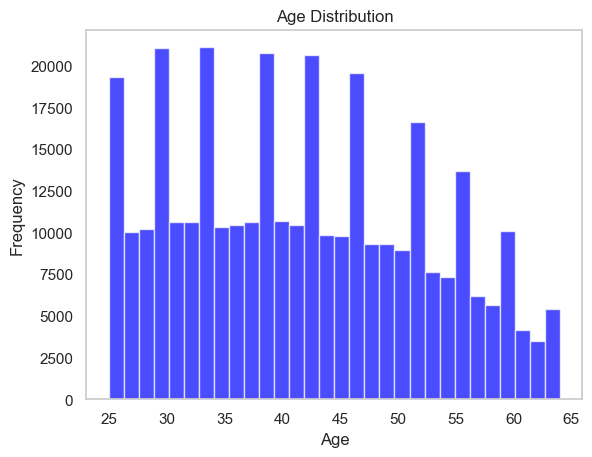

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('path_to_your_dataset.csv')

# Example: Assuming 'age' is a column in your DataFrame
# Plotting age distribution
plt.hist(new_data['age'], bins=30, color='blue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()


Unique values in 'sex' column: [1 2]
1 - Male, 2 - Female


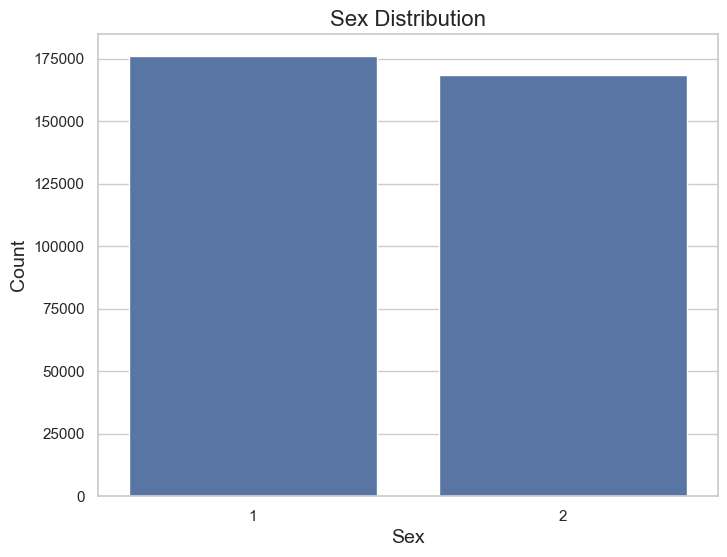

<Figure size 640x480 with 0 Axes>

In [32]:
import pandas as pd

# Step 2: Check the unique values in the 'sex' column
print("Unique values in 'sex' column:", new_data['sex'].unique())
print("1 - Male, 2 - Female")

# Step 3: Count the occurrences of each category in the 'sex' column
sex_distribution = new_data['sex'].value_counts()

# Step 4: Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=new_data, x='sex', order=sex_distribution.index)

# Add titles and labels
plt.title('Sex Distribution', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Step 5: Show the plot
plt.show()

# Optional: Save the plot as an image file
plt.savefig('sex_distribution.png', bbox_inches='tight')


In [20]:
# def load_dataset(file_path):
#     try:
#         data = pd.read_csv(file_path)
#         print(f"Dataset loaded successfully with {data.shape[0]} rows and {data.shape[1]} columns.")
#         return data
#     except Exception as e:
#         print(f"Error loading dataset: {e}")
#         return None

# # Define file paths for your CSV files
# file_path_cps = 'Datasets/CurrentPopulationSurvey.csv'
# file_path_psid = 'Datasets/PanelStudyIncomeDynamics.csv'

# # Load both datasets
# cps_data = load_dataset(file_path_cps)
# psid_data = load_dataset(file_path_psid)

# numerical_columns_cps = cps_data.select_dtypes(include=[np.number]).columns
# numerical_columns_psid = psid_data.select_dtypes(include=[np.number]).columns
# categorical_columns_cps = cps_data.select_dtypes(exclude=[np.number]).columns
# categorical_columns_psid = psid_data.select_dtypes(exclude=[np.number]).columns

In [21]:
# # Cell 3: Display basic information about the datasets
# print("\nCurrent Population Survey Dataset Info:")
# cps_data.info()

# print("\nPanel Study Income Dynamics Dataset Info:")
# psid_data.info()

# # Display the first few rows
# print("\nCurrent Population Survey Dataset Head:")
# print(cps_data.head())

# print("\nPanel Study Income Dynamics Dataset Head:")
# print(psid_data.head())


In [22]:
# # Cell 4: Check for missing values
# print("\nMissing Values in CPS Dataset:")
# missing_values_cps = cps_data.isnull().sum()
# print(missing_values_cps[missing_values_cps > 0])

# print("\nMissing Values in PSID Dataset:")
# missing_values_psid = psid_data.isnull().sum()
# print(missing_values_psid[missing_values_psid > 0])

# # Visualize missing values
# msno.matrix(cps_data)
# plt.title("CPS Missing Values Matrix")
# plt.show()

# msno.matrix(psid_data)
# plt.title("PSID Missing Values Matrix")
# plt.show()


In [23]:
# # Cell 5: Summary statistics for numerical and categorical data
# print("\nSummary Statistics for CPS Dataset:")
# print(cps_data.describe(include='all'))

# print("\nSummary Statistics for PSID Dataset:")
# print(psid_data.describe(include='all'))


In [24]:
# def plot_countplots(data, columns, num_cols=3):
#     num_rows = (len(columns) + num_cols - 1) // num_cols
#     fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
#     axes = axes.flatten()

#     for i, column in enumerate(columns):
#         sns.countplot(data=data, x=column, ax=axes[i])
#         axes[i].set_title(f'Distribution of {column}')

#     for j in range(i + 1, len(axes)):
#         axes[j].axis('off')

#     plt.tight_layout()
#     plt.show()

# # Count plots for CPS dataset
# categorical_columns_cps = cps_data.select_dtypes(exclude=[np.number]).columns
# plot_countplots(cps_data, categorical_columns_cps)

# # Count plots for PSID dataset
# categorical_columns_psid = psid_data.select_dtypes(exclude=[np.number]).columns
# plot_countplots(psid_data, categorical_columns_psid)